## Learn Data Cleaning

Source: kaggle.com
Author: Rachael Tatman

Start Date: 10 Apr 2025

Completed:  13 Apr 2025


In [53]:
## Packages to load & use
import pandas as pd
import numpy as np
import datetime, charset_normalizer

from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

## Path to data folder
import os
datapath = os.getcwd() + '/data'

## Random seeding
np.random.seed(0)

---

### I. Handling Missing Values

In [2]:
nfl_data = pd.read_csv(datapath+'/NFL Play by Play 2009-2017 (v4).csv')

np.random.seed(0)

nfl_data.head(5)

/tmp/ipykernel_6943/2023206973.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv(datapath+'/NFL Play by Play 2009-2017 (v4).csv')


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [7]:
missing_val_ct = nfl_data.isnull().sum()

missing_val_ct[0:10]


Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [8]:
total_size      = np.product( nfl_data.shape )
total_missing   = missing_val_ct.sum()
percent_missing = 100 * (total_missing/total_size)

print(round(percent_missing, 4))
del total_size, total_missing, percent_missing

27.6672


In [10]:
## Look at the 'TimeSecs' column
## --- "the number of seconds left in the game when a play was made"

nfl_data.TimeSecs.isnull().sum()


224

In [12]:
## Look at 'PenalizedTeam' column
## --- expect to be higher since penalties do not happen at every play

nfl_data.PenalizedTeam.isnull().sum()


378189

In [13]:
### Try: Simply Drop missing values

nfl_data.dropna()


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [14]:
cols_without_na = nfl_data.dropna(axis=1)

cols_without_na.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [15]:
print("Columns in original_dataset: %d \n" % nfl_data.shape[1])

print("Columns with NA's dropped: %d " % cols_without_na.shape[1])


Columns in original_dataset: 102 

Columns with NA's dropped: 37 


In [16]:
## Work on: filling in missing data automatically

subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()

subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [17]:
subset_nfl_data.fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [ ]:
subset_nfl_data.fillna(method='bfill', # replace NA's with value that comes directly after it, else 0's
                       axis=0).fillna(0)

/tmp/ipykernel_6943/2064638464.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill',


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [19]:
del subset_nfl_data, cols_without_na, missing_val_ct, nfl_data


---

### II. Scaling & Normalization

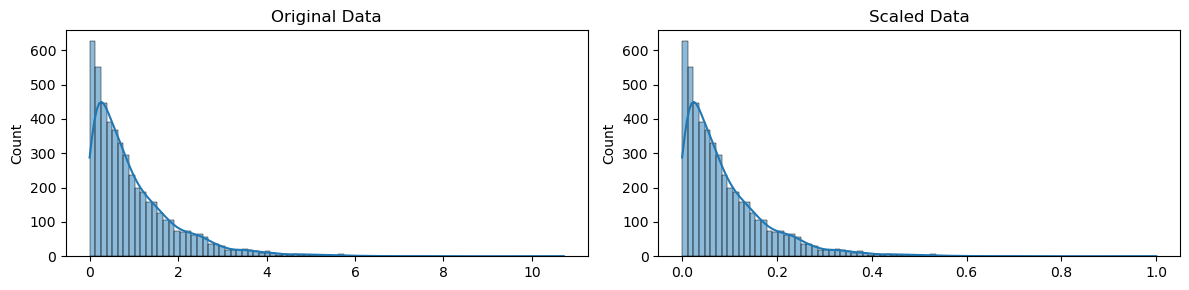

In [4]:
## Visualizing Scaling

original_data = np.random.exponential(size=5000)
scaled_data   = minmax_scaling(original_data, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(12,3))

sns.histplot(data = original_data,
             ax = ax[0],
             kde = True, legend = False)
ax[0].set_title("Original Data")

sns.histplot(data = scaled_data,
             ax = ax[1],
             kde = True, legend = False)
ax[1].set_title("Scaled Data")

plt.tight_layout()
plt.show()
plt.clf

del original_data, scaled_data

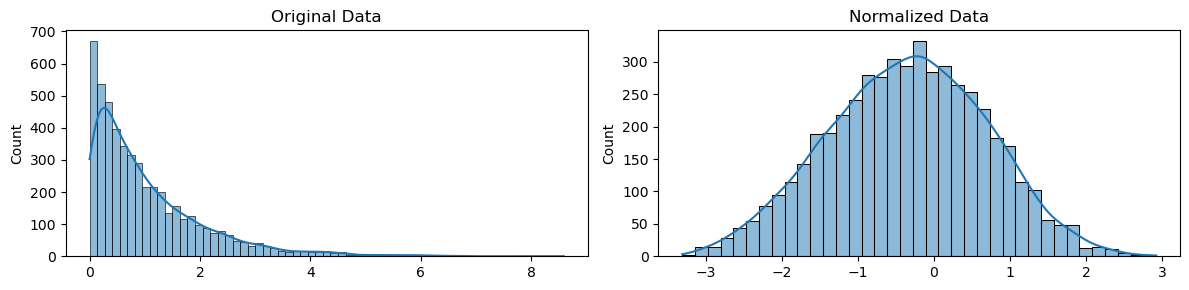

In [6]:
## Visualizating Normalization

original_data = np.random.exponential(size=5000)

#-!- use of the Box-Cox Transformation technique
norm_data     = stats.boxcox(original_data)

fig, ax = plt.subplots(1, 2, figsize=(12,3))

sns.histplot(data = original_data,
             ax = ax[0],
             kde = True, legend = False)
ax[0].set_title("Original Data")

sns.histplot(data = norm_data,
             ax = ax[1],
             kde = True, legend = False)
ax[1].set_title("Normalized Data")

plt.tight_layout()
plt.show()
plt.clf

del original_data, norm_data


In [7]:
## Play with real data
## Which columns should I scale, and which should I normalize?

df = pd.read_csv(datapath + '/ww2_summary_weather_conditions.csv')
df.head()

/tmp/ipykernel_12457/2020199703.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath + '/ww2_summary_weather_conditions.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df["STA"].value_counts()

STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
         ... 
42206      50
33123      47
43307      46
34101      31
33121      13
Name: count, Length: 159, dtype: int64

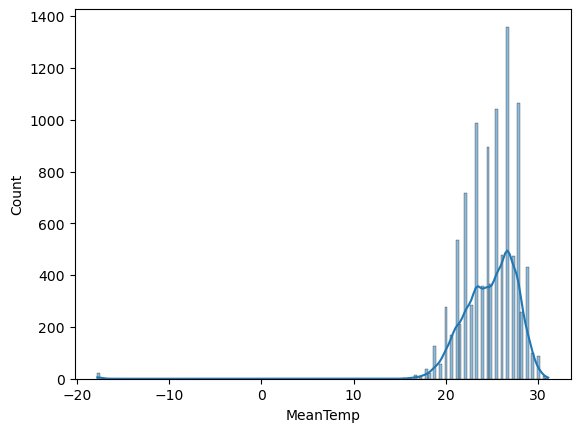

<Figure size 640x480 with 0 Axes>

In [27]:
STANS = [22508, 10701, 22502, 22504, 10803]
sns.histplot(data = df[df.STA.isin(STANS)].MeanTemp, kde=True)
plt.show()
plt.clf()

In [28]:
del df

---

### III. Parsing Data

In [30]:
landslides = pd.read_csv(datapath+'/catalog.csv')
landslides.head(5)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [31]:
print(landslides.date.head(5))

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [32]:
## Convert date from an 'object' datatype to a date-specific information

landslides['date_parsed'] = pd.to_datetime(landslides.date, format="%m/%d/%y")


In [33]:
print(landslides.date_parsed.head(5))

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]


In [34]:
day_of_month_landslides = landslides.date_parsed.dt.day.dropna()
day_of_month_landslides.head(5)


0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

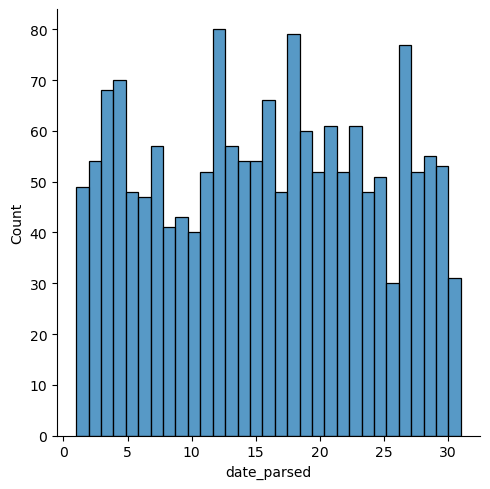

In [35]:
sns.displot(day_of_month_landslides, kde=False, bins=31)

In [36]:
del landslides, day_of_month_landslides

In [37]:
### Extra Practice

volcanos = pd.read_csv(datapath+'/database_volcanic_activity.csv')
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [38]:
volcanos['Last Known Eruption'].sample(10)

764      Unknown
1069     1996 CE
34       1855 CE
489      2016 CE
9        1302 CE
641      Unknown
1115     Unknown
530     3500 BCE
575      Unknown
219      Unknown
Name: Last Known Eruption, dtype: object

In [41]:
volcanos['Last Known Eruption'].value_counts()

Last Known Eruption
Unknown     637
2016 CE      68
2015 CE      21
2014 CE      14
2012 CE      13
           ... 
5830 BCE      1
1739 CE       1
1320 CE       1
1080 CE       1
1905 CE       1
Name: count, Length: 399, dtype: int64

In [ ]:
volcanos2 = volcanos[volcanos['Last Known Eruption'] != 'Unknown'].copy().reset_index(drop=True)

print(len(volcanos))
print(len(volcanos2))

In [43]:
volcanos2['year_eruption'] = ''

for i in range(len(volcanos2)):
    if 'BCE' in volcanos2.loc[i, 'Last Known Eruption']:
        volcanos2.loc[i, 'year_eruption'] = -1*int(volcanos2.loc[i, 'Last Known Eruption'].split(' ')[0])
    elif 'CE' in volcanos2.loc[i, 'Last Known Eruption']:
        volcanos2.loc[i, 'year_eruption'] = int(volcanos2.loc[i, 'Last Known Eruption'].split(' ')[0])


In [50]:
volcanos2[volcanos2.year_eruption == volcanos2.year_eruption.min()]

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,year_eruption
60,222161,Igwisi Hills,Tanzania,Africa and Red Sea,Pyroclastic cone(s),Eruption Dated,10450 BCE,-4.889,31.933,1146,Foidite,Rift Zone / Continental Crust (>25 km),-10450


In [51]:
volcanos2[volcanos2.year_eruption == volcanos2.year_eruption.max()]

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,year_eruption
9,211040,Stromboli,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,2016 CE,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction Zone / Continental Crust (>25 km),2016
12,211060,Etna,Italy,Mediterranean and Western Asia,Stratovolcano(es),Eruption Observed,2016 CE,37.734,15.004,3330,Trachybasalt / Tephrite Basanite,Subduction Zone / Continental Crust (>25 km),2016
35,221080,Erta Ale,Ethiopia,Africa and Red Sea,Shield,Eruption Observed,2016 CE,13.600,40.670,613,Basalt / Picro-Basalt,Rift Zone / Intermediate Crust (15-25 km),2016
66,223030,Nyiragongo,DR Congo,Africa and Red Sea,Stratovolcano,Eruption Observed,2016 CE,-1.520,29.250,3470,Foidite,Rift Zone / Continental Crust (>25 km),2016
89,233020,"Fournaise, Piton de la",France,Middle East and Indian Ocean,Shield,Eruption Observed,2016 CE,-21.244,55.708,2632,Basalt / Picro-Basalt,Intraplate / Oceanic Crust (< 15 km),2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,357090,Copahue,Chile-Argentina,South America,Stratovolcano,Eruption Observed,2016 CE,-37.856,-71.183,2953,Trachybasalt / Tephrite Basanite,Subduction Zone / Continental Crust (>25 km),2016
761,357120,Villarrica,Chile,South America,Stratovolcano,Eruption Observed,2016 CE,-39.420,-71.930,2847,Basalt / Picro-Basalt,Subduction Zone / Continental Crust (>25 km),2016
858,390020,Erebus,Antarctica,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-77.530,167.170,3794,Phonolite,Intraplate / Continental Crust (>25 km),2016
865,390080,Bristol Island,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-59.017,-26.533,1100,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),2016


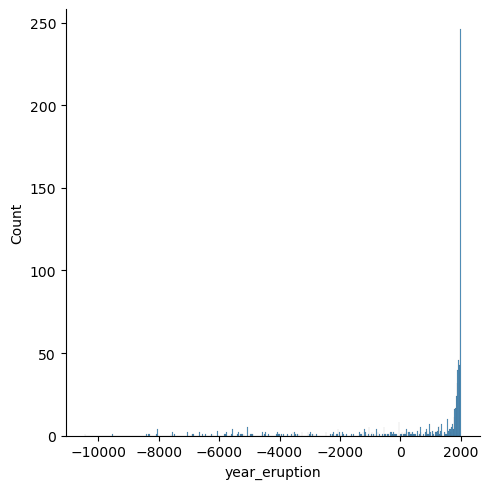

In [47]:
sns.displot(volcanos2.year_eruption, kde=False, bins=500)

In [52]:
del volcanos, volcanos2


---

### IV. Character Encodings

In [60]:
before = "This is the euro symbol: €"
type(before)

str

In [61]:
after = before.encode("utf-8", errors="replace")
type(after)

bytes

In [62]:
before

'This is the euro symbol: €'

In [63]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [64]:
print(after.decode('utf-8'))

This is the euro symbol: €


In [65]:
print(after.decode('ascii'))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [66]:
print(after.decode('utf-16'))

桔獩椠⁳桴⁥略潲猠浹潢㩬겂


In [70]:
print(after.decode('utf-32'))

UnicodeDecodeError: 'utf-32-le' codec can't decode bytes in position 0-3: code point not in range(0x110000)

In [72]:
before = "This is the euro symbol: €"
after  = before.encode("ascii", errors="replace")

print(after.decode("ascii"))


This is the euro symbol: ?


In [73]:
del before, after

In [74]:
kickstarter_2016 = pd.read_csv(datapath+'/ks-projects-201612.csv')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

In [81]:
with open(datapath+'/ks-projects-201612.csv', 'rb') as infile:
    result = charset_normalizer.detect(infile.read(10000))
    print(result)

with open(datapath+'/ks-projects-201801.csv', 'rb') as infile:
    result = charset_normalizer.detect(infile.read(10000))
    print(result)


{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}
{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}


In [82]:
kickstarter_2016 = pd.read_csv(datapath+'/ks-projects-201612.csv',
                               encoding="Windows-1252")
kickstarter_2016.head()

/tmp/ipykernel_12457/3260658104.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv(datapath+'/ks-projects-201612.csv',


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [83]:
kickstarter_2016.to_csv(datapath+'/ks-projects-201612-utf8.csv')
del kickstarter_2016


---

### V. Inconsistent Data Entry

In [ ]:
#!pip install fuzzywuzzy


In [85]:
import fuzzywuzzy
from fuzzywuzzy import process


/home/rty10/miniconda3/envs/datasci/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [102]:
professors = pd.read_csv(datapath +'/pakistan_intellectual_capital.csv')


In [87]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [103]:
countries = professors.Country.unique()

countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [104]:
professors.Country = professors.Country.str.lower()
professors.Country = professors.Country.str.strip()


In [105]:
countries = professors.Country.unique()

countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

In [106]:
matches = fuzzywuzzy.process.extract("south korea",
                                     countries,
                                     limit=10,
                                     scorer=fuzzywuzzy.fuzz.token_sort_ratio)

matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [107]:
def replace_matches_in_column(df, column, str_to_match, min_ratio=47):
    '''
    Function that replace rows in provided column(s) of dataframe 'df'
    that match the provided string 'str_to_match' avoce the provided ratio
    'min_ratio' with provided string
    Dependencies: pandas, fuzzywuzzy
    ''' 
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(str_to_match, 
                                         strings, 
                                         limit=10, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [match[0] for match in matches 
                    if match[1] >= min_ratio]

    rows_with_matches                 = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = str_to_match
    print("Match replacement complete")
    return


In [108]:
replace_matches_in_column(df=professors,
                          column='Country',
                          str_to_match='south korea')


Match replacement complete


In [109]:
countries = professors.Country.unique()

countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [110]:
professors.to_csv(datapath+'/pakistan_intellectual_capital_updated.csv')

In [111]:
del professors, countries, matches

---